# Objective

<br>

**With the current available data, we'll try to analyse the following points:**<br><br>

<b>

1. Top 10 Most selling products<br>
2. Top 10 products having highest sales<br>
3. Cateogry and Sub-Category wise highest sales<br>
4. Top 10 cities with highest sales<br>
5. Region wise sales<br>
6. Highest no. of orders palced by which segment<br>
7. Top 10 customers placing highest no. of orders<br>
8. Year wise sales<br>
9. Monthly sales for a each year 




In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading csv file
data = pd.read_csv('dataset.csv')

In [3]:
#first 5 rows
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


<br>

#  Data Preparation/Cleaning  <br>

In [4]:
#set index to Row ID

data.set_index('Row ID',inplace=True)


In [5]:
#Row ID as a new index
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [6]:
#shape of data
data.shape

(9800, 17)

In [7]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [8]:
#check for null values
data.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
#checking city for null postal code
data.loc[data['Postal Code'].isna(),'City']

Row ID
2235    Burlington
5275    Burlington
8799    Burlington
9147    Burlington
9148    Burlington
9149    Burlington
9387    Burlington
9388    Burlington
9389    Burlington
9390    Burlington
9742    Burlington
Name: City, dtype: object

<br>Since it's a same city for all null values. We'll try to find out if a postal code is available for Burlington in any other row.


In [10]:
data.loc[data['City']=='Burlington','Postal Code'].unique()

array([27217., 52601.,    nan])

We are getting two values here. Hence we can't fix null values without any additional knowledge that which customer is from which postal code.So it's better to drop that column as it will not be used in analysis.


In [11]:
data.drop(columns=['Postal Code'],inplace=True)

In [12]:
#column 'Postal Code' is removed
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [13]:
#converting data types
data['Order Date'] = pd.to_datetime(data['Order Date'],format='%d/%m/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'],format='%d/%m/%Y')


In [14]:
data.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [15]:
#sorting data by dates

data.sort_values('Order Date',inplace=True)


In [16]:
#creating month and year column
data['Year'] = data['Order Date'].dt.strftime('%Y')
data['Month'] = data['Order Date'].dt.month_name()


data['Month'] = data['Month'].replace({'January':'Jan','February':'Feb','March':'Mar','April':'Apr','May':'May','June':'Jun','July':"Jul",'August':'Aug','September':'Sep','October':'Oct','November':'Nov','December':'Dec'})
months_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data['Month'] = pd.Categorical(data['Month'],categories=months_order,ordered=True)

<br><br><br>

# Exploratory Data Analysis <br>

In [17]:
#overall trend
print(data['Order Date'].min())
print(data['Order Date'].max())

2015-01-03 00:00:00
2018-12-30 00:00:00


<br><br><br><br><br>

**Top 10 most selling products**

In [18]:
top_products = data['Product Name'].value_counts().sort_values(ascending=False).head(10)
top_products

Staple envelope                                              47
Staples                                                      46
Easy-staple paper                                            44
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      18
Staple remover                                               18
KI Adjustable-Height Table                                   17
Storex Dura Pro Binders                                      17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: Product Name, dtype: int64

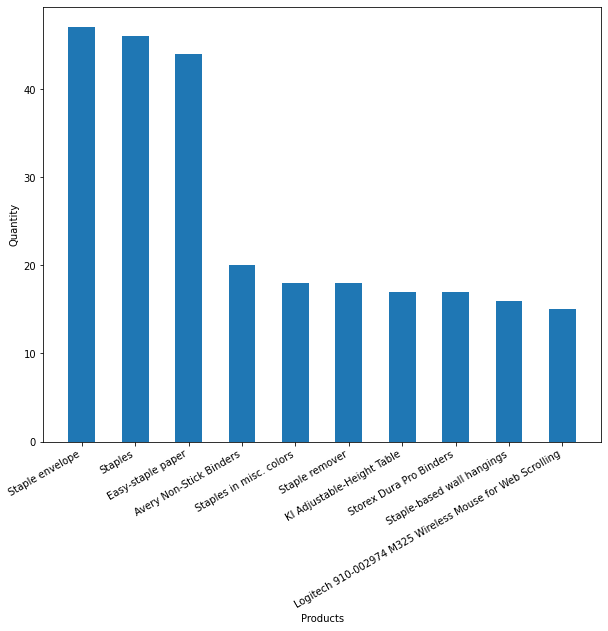

In [19]:
plt.figure(figsize=(10,8))
plt.bar(top_products.index,top_products,0.5)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.xticks(rotation='30',ha='right')
plt.show()

<br><br><br><br><br>

**Top 10 products having highest sales**

In [20]:
prod_sales = data.groupby(['Product Name'])['Sales'].sum().sort_values(ascending=False).head(10)
prod_sales

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

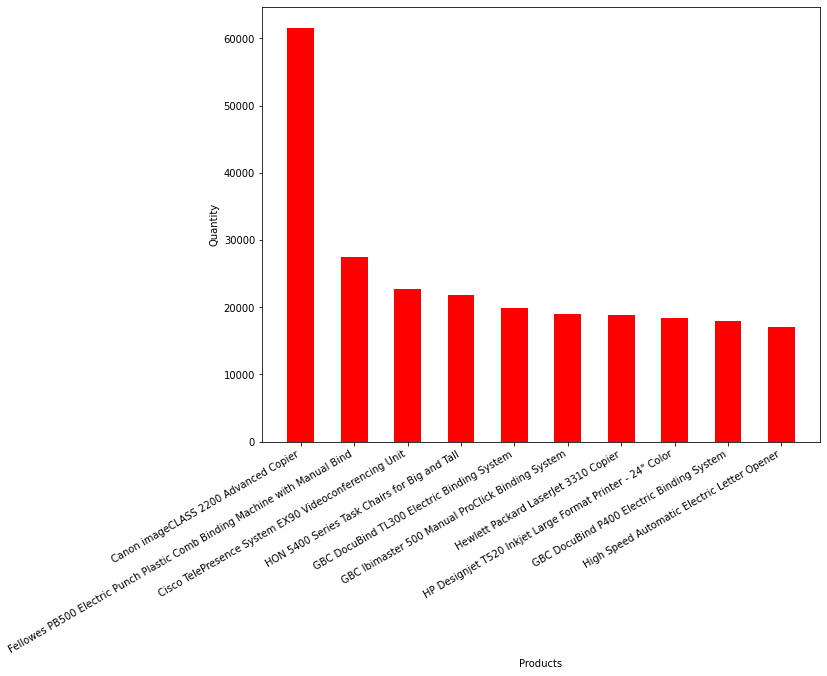

In [21]:
plt.figure(figsize=(10,8))
plt.bar(prod_sales.index,prod_sales,0.5,color='red')
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.xticks(rotation='30',ha='right')
plt.show()

<br><br><br><br><br>

**Cateogry and Sub-Category wise highest sales**

In [22]:
#Category-wise highest sale
  
cat_sales = data.groupby(['Category'])['Sales'].sum()


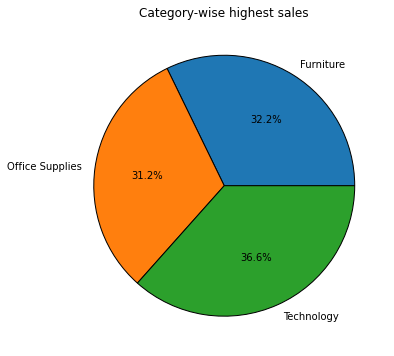

In [23]:
plt.figure(figsize=(6,6))
plt.pie(cat_sales,labels=cat_sales.index,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Category-wise highest sales')
plt.show()

In [24]:
cat_grp =  pd.DataFrame(data.groupby(['Category','Sub-Category'])['Sales'].sum())

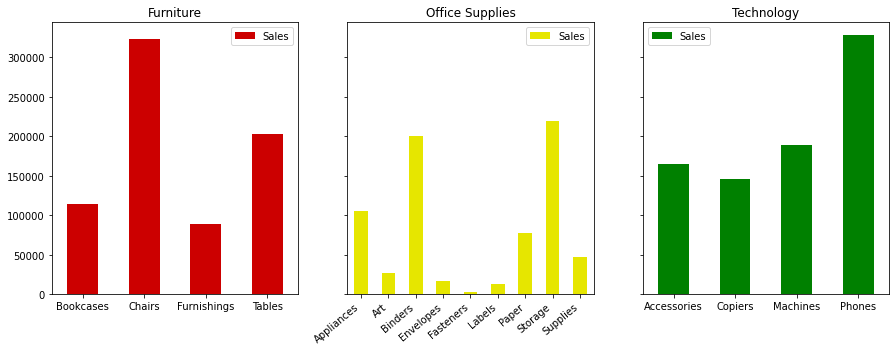

In [25]:
fig,axes = plt.subplots(1,3,sharey=True,figsize=(15,5))
df1 = cat_grp.loc['Furniture'].plot(kind='bar',color='#cc0000',title='Furniture',xlabel='',ax = axes[0],rot='horizontal')

df2 = cat_grp.loc['Office Supplies'].plot(kind='bar',color='#e6e600',title='Office Supplies',xlabel='',ax = axes[1],rot='40')
axes[1].set_xticklabels(axes[1].get_xticklabels(),ha='right')

df3 = cat_grp.loc['Technology'].plot(kind='bar',color='green',title='Technology',xlabel='',ax = axes[2],rot='horizontal')


<br><br><br><br><br>

**Top 10 cities with highest sales**

In [26]:
city_grp = data.groupby(['City'])['Sales'].sum().sort_values(ascending=False).head(10)
city_grp

City
New York City    252462.5470
Los Angeles      173420.1810
Seattle          116106.3220
San Francisco    109041.1200
Philadelphia     108841.7490
Houston           63956.1428
Chicago           47820.1330
San Diego         47521.0290
Jacksonville      44713.1830
Detroit           42446.9440
Name: Sales, dtype: float64

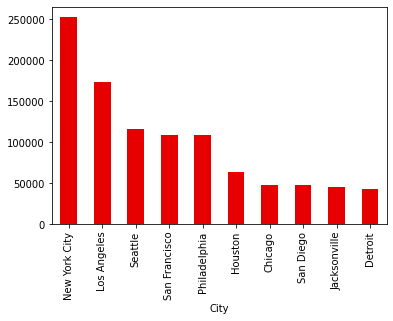

In [27]:
city_grp.plot(kind='bar',color='#e60000')
plt.show()

<br><br><br><br><br>**Region wise sales**

In [28]:
reg_grp = data.groupby('Region')['Sales'].sum()


<AxesSubplot:xlabel='Region'>

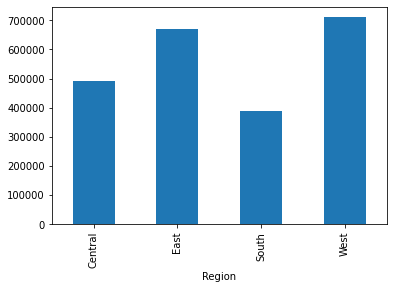

In [29]:
reg_grp.plot(kind='bar')

<br><br><br><br><br>

**Highest no. of orders palced by which segment**

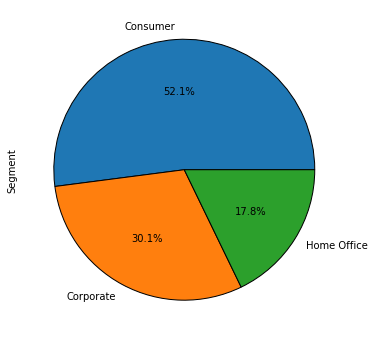

In [30]:
data['Segment'].value_counts().plot(kind='pie',autopct="%1.1f%%",figsize=(6,6),wedgeprops={'edgecolor':'black'})
plt.show()

<br><br><br><br><br>

**Top 10 customers placing highest no. of orders**

In [31]:
data['Customer Name'].value_counts().sort_values(ascending=False).head(10)

William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Seth Vernon            32
Jonathan Doherty       32
Chloris Kastensmidt    32
Arthur Prichep         31
Zuschuss Carroll       31
Emily Phan             31
Name: Customer Name, dtype: int64

<br><br><br><br><br>

**Year wise sales**

In [32]:
year_grp = data.groupby(['Year'])['Sales'].sum()

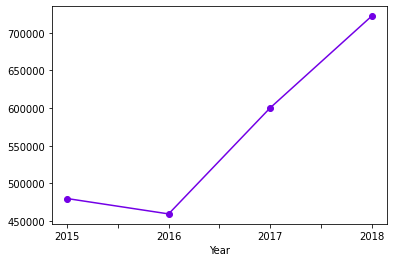

In [33]:
year_grp.plot(marker='o',color='#7300e6')
plt.show()

<br><br><br><br><br>

**Monthly sales for each year**

In [34]:
month_grp = pd.DataFrame(data.groupby(['Year','Month'])['Sales'].sum())

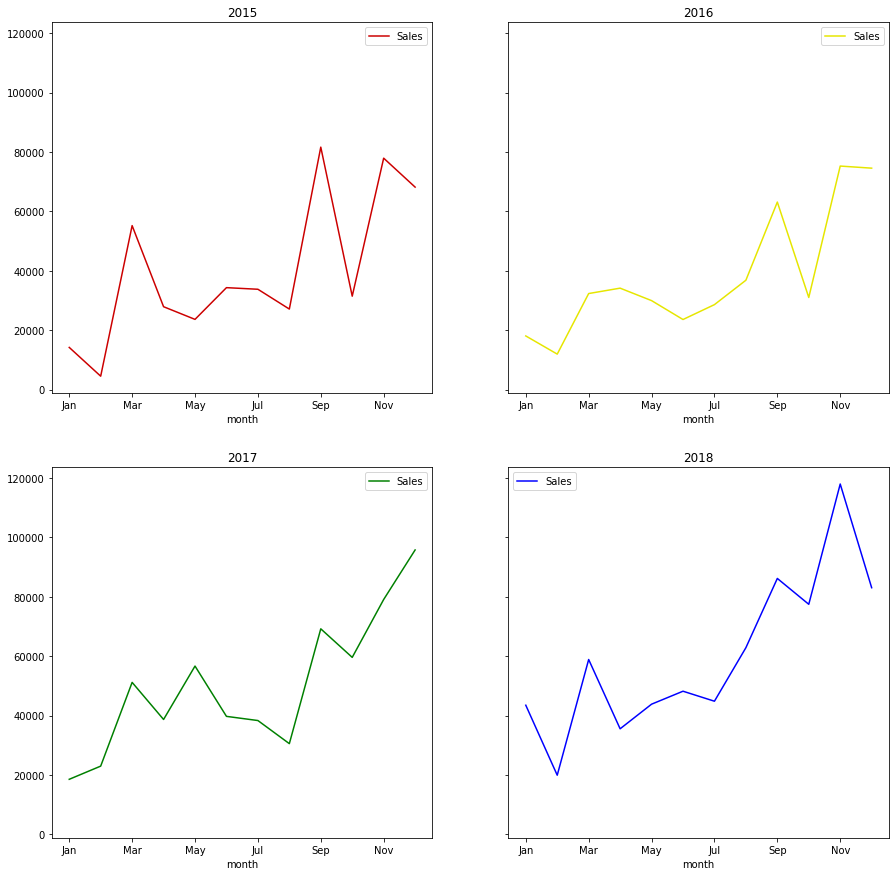

In [35]:
fig,axes = plt.subplots(2,2,sharey=True,figsize=(15,15))
df4 = month_grp.loc['2015'].plot(color='#cc0000',title='2015',xlabel='month',ax = axes[0,0],rot='horizontal')


df5 = month_grp.loc['2016'].plot(color='#e6e600',title='2016',xlabel='month',ax = axes[0,1],rot='0')

df6 = month_grp.loc['2017'].plot(color='green',title='2017',xlabel='month',ax = axes[1,0],rot='0')

df7 = month_grp.loc['2018'].plot(color='blue',title='2018',xlabel='month',ax = axes[1,1],rot='0')

